In [1]:
import os
from pathlib import Path
import pandas
print(pandas)

<module 'pandas' from '/home/asheshjyoti/anaconda3/lib/python3.11/site-packages/pandas/__init__.py'>


In [3]:
datasets = Path('../datasets/').resolve()

# show all files in datasets folder
for x in Path(datasets).iterdir():
    print(x.stem)

OECD_Life_Index


# Data Preparation

In [3]:
root_dataset = 'https://raw.githubusercontent.com/ageron/data/ead32577ad88c258b68b0149781b8e35f1bb160f/lifesat/'

df = pandas.read_csv(root_dataset+'lifesat.csv')

print(df.info())
print("\n\n---------------------------------------")

print(df.head(5))
print("\n\n---------------------------------------")

# sorting according to life satisfaction

df = df.sort_values(by="GDP per capita (USD)", ascending=True)

print(df.head(5))


x, y = df['GDP per capita (USD)'], df['Life satisfaction']
X, Y = df[['GDP per capita (USD)']], df[['Life satisfaction']]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2369 entries, 0 to 2368
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   STRUCTURE              2369 non-null   object 
 1   STRUCTURE_ID           2369 non-null   object 
 2   STRUCTURE_NAME         2369 non-null   object 
 3   ACTION                 2369 non-null   object 
 4   LOCATION               2369 non-null   object 
 5   Country                2369 non-null   object 
 6   INDICATOR              2369 non-null   object 
 7   Indicator              2369 non-null   object 
 8   MEASURE                2369 non-null   object 
 9   Measure                2369 non-null   object 
 10  INEQUALITY             2369 non-null   object 
 11  Inequality             0 non-null      float64
 12  OBS_VALUE              2369 non-null   float64
 13  Observation Value      0 non-null      float64
 14  OBS_STATUS             2369 non-null   object 
 15  Obse

KeyError: 'GDP per capita (USD)'

# Data Viz

original index [1, 5, 2, 4, 7, 0, 3, 9, 10, 12, 6, 8, 14, 13, 18, 26, 21, 22, 11, 15, 19, 20, 16, 24, 23, 17, 25]
size [50, 50, 60, 70, 80, 90, 100, 100, 100, 110, 120, 130, 140, 150, 160, 160, 170, 180, 190, 200, 200, 200, 210, 210, 220, 230, 230]
[90, 50, 60, 100, 110, 50, 80, 140, 100, 160, 70, 120, 190, 150, 130, 230, 200, 170, 100, 230, 160, 200, 200, 210, 220, 210, 180]


Text(0, 0.5, 'Life Satisfaction')

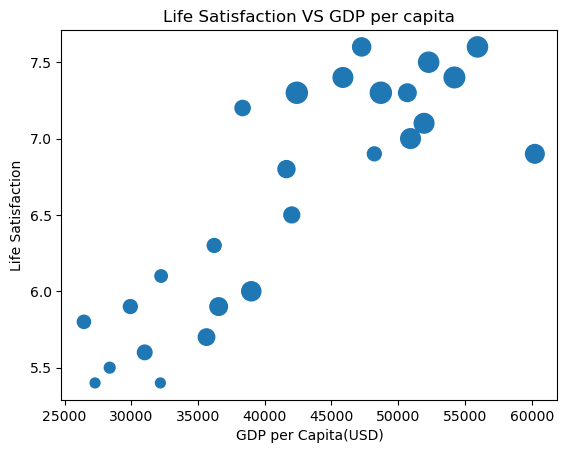

In [5]:
from matplotlib import pyplot
life_sat = y.sort_values(axis=0)
# size creator
value =50
size = []
record =[]
for index,z in enumerate(life_sat.tolist()):
    record.append(z)
    if index==0:
        pass
    if record[index-1] != z:
        value=value+10
        size.append(value)
    else:
        size.append(value)

# original index
org_index = life_sat.index.tolist()
print("original index",org_index)

new_size = []
#arranging sizes according to original
print("size",size)
for index, m in enumerate(org_index):

    new_size.append(size[org_index[m]])
    
print(new_size)
pyplot.scatter(x,y,s=new_size)
pyplot.title("Life Satisfaction VS GDP per capita",size=12)
pyplot.xlabel("GDP per Capita(USD)",size = 10)
pyplot.ylabel("Life Satisfaction",size = 10)

# Fitting a Linear Regression Model

In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(df[['GDP per capita (USD)']],df['Life satisfaction'])



LinearRegression()

In [13]:
model.predict([[37655.2]])
# model.predict(37655.2)



/home/asheshjyoti/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6.30165767])

In [15]:
# to find the value of coeffiecient (slope) that the model calculated
print(model.coef_)
# to find the value of intercept that the model calculated
print(model.intercept_)

[6.77889969e-05]
3.74904942737691


In [36]:
answer = (model.coef_ * 37655.2)+ model.intercept_
print("Value of predicted Y for per capita GDP 37655.2 is: ", answer)

Value of predicted Y for per capita GDP 37655.2 is:  [6.30165767]


/home/asheshjyoti/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: x and y must have same first dimension, but have shapes (27, 1) and (1,)

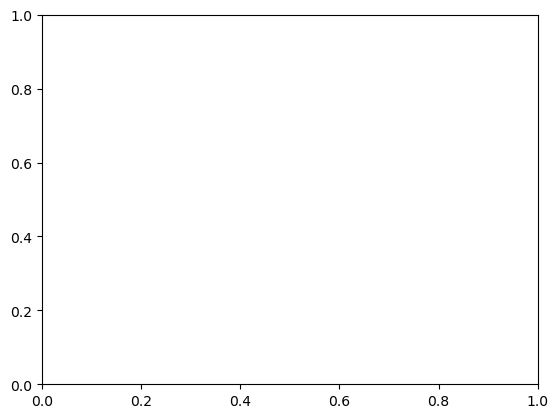

In [40]:
pyplot.plot(df[['GDP per capita (USD)']],model.predict([answer]))